I will be implementing an Artificial Neural Network on data with 2 predictors and binary classification

# Read our data in from the file

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import math


%matplotlib inline

data = []
with open('ex2data2.txt') as fp:
    line = fp.readline()
    while line:
        line = fp.readline()
        line = line.replace('\n', '')
        line = line.replace(' ', '')
        lineArr = line.split(',')
        try:
            lineArr2 = [float(lineArr[0]), float(lineArr[1]), float(lineArr[2])]
        except ValueError:
            pass
        data.append(lineArr2)
df = pd.DataFrame(data, columns=['x1', 'x2', 'label'])
df = df.sample(frac=1, replace=True)

X = []
Y = []
for t in df.itertuples():
    currentx = np.array([t[1], t[2]]).T
    X.append(currentx)
    Y.append(t[3])

X = np.matrix(X).T
Y = np.matrix(Y).T

# Our data:

In [53]:
df.head()

,x1,x2,label
104,-0.49021,-0.301900,0.0
87,-0.40380,0.706870,0.0
53,-0.20795,0.173250,1.0
90,-0.54781,0.706870,0.0
116,0.63265,-0.030612,0.0


# Visualizing our data

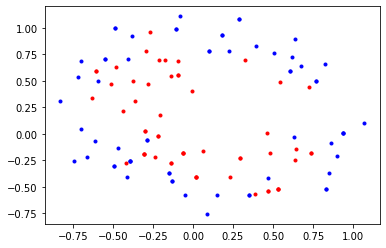

In [54]:
df0 = df[df['label'] == 0]
df1 = df[df['label'] == 1]
plt.plot(df0['x1'], df0['x2'], 'b.')
plt.plot(df1['x1'], df1['x2'], 'r.')
plt.show()

# Our Neural Network has:
#         - 2 input nodes
#         - 4 hidden layer 1 nodes
#         - 4 hidden layer 2 nodes
#         - 1 output node

# Creating our Functions needed for Forward and Back Propogation

In [55]:
def tanhActivation(z1Arr):
    return np.tanh(z1Arr)

def sigmoid(z2Arr):
    return np.array(1/(1+np.power(math.e, -z2Arr)))

def costFunction(A3):
    vectorCost = np.multiply(np.log(A3), Y) + np.multiply((1 - Y), np.log(1 - A3))
    cost = -np.sum(vectorCost)/m
    return cost

def tanhPrime(ZArr):
    return 1 - np.power((tanhActivation(ZArr)), 2)

def forwardProp(W1t, xt, B1t):
    z1t = np.dot(W1t, xt) + B1t
    a1 = tanhActivation(z1t)
    z2 = np.dot(W2, a1) + B2
    a2 = tanhActivation(z2)
    z3 = np.dot(W3, a2) + B3
    return sigmoid(z3)


# Initialize weights to a random decimal number between -1 and 1

In [56]:
#------------------
#input layer
nInLayer = 2
#------------------

#------------------
#hidden layer 1
nHiddenLayer1 = 4
#hidden layer 2
nHiddenLayer2 = 4
#------------------

#------------------
#output layer     
nOutLayer = 1
#------------------

W1 = 2 * np.random.randn(nHiddenLayer1, nInLayer) - 1
W2 = 2 * np.random.rand(nHiddenLayer2, nHiddenLayer1) - 1
W3 = 2 * np.random.rand(nOutLayer, nHiddenLayer2) - 1


B1 = 2 * np.random.randn(nHiddenLayer1, 1) - 1
B2 = 2 * np.random.randn(nHiddenLayer2, 1) - 1
B3 = 2 * np.random.randn(nOutLayer, 1) - 1

# Time to train our neural network!

Our learning rate (a) is set to 0.003. Our neural network will train on 30,000 iterations

In [57]:
a = 0.003

#forward propogation on entire training set
m = 1652
iterations = 30000

for it in range(iterations):
    #A3 = forwardProp(W1,X,B1)
    Z1 = np.dot(W1, X) + B1
    A1 = tanhActivation(Z1)
    Z2 = np.dot(W2, A1) + B2
    A2 = tanhActivation(Z2)
    Z3 = np.dot(W3, A2).T + B3
    A3 = sigmoid(Z3).T
    
    
    #BACKPROP
    #Output layer to 2nd hidden layer
    dZ3 = A3.T-Y
    dW3 = np.matmul(dZ3.T, A2.T)/m
    dB3 = np.sum(dZ3, axis=1)/m
    
    #2nd hidden layer to 1st hidden layer
    dZ2 = np.multiply(np.matmul(np.matrix(W3.T), np.matrix(dZ3).T), tanhPrime(np.matrix(Z2)))
    dW2 = np.matmul(dZ2, A1.T)/m
    dB2 = np.sum(dZ2, axis=1)/m

    #1st hidden layer to input layer
    dZ1 = np.multiply(np.matmul(np.matrix(W2.T), np.matrix(dZ2)), tanhPrime(np.matrix(Z1)))
    dW1 = np.matmul(dZ1, X.T)/m
    dB1 = np.sum(dZ1, axis=1)/m

    #UPDATE WEIGHTS AND BIASES:
    W1 = W1 - (a*dW1)
    W2 = W2 - (a*dW2)
    W3 = W3 - (a*dW3)
    B1 = B1 - (a*dB1)
    B2 = B2 - (a*dB2)
    B3 = B3 - (a*dB3)

    if it % 1000 == 0:
        print("Cost at iteration #" + str(it) + ": " + str(costFunction(A3)))
    


Cost at iteration #0: 19.048181337820772
Cost at iteration #1000: 17.70461777137245
Cost at iteration #2000: 16.39385587160383
Cost at iteration #3000: 15.148338066312611
Cost at iteration #4000: 13.992547802966687
Cost at iteration #5000: 12.924156719936056
Cost at iteration #6000: 11.927024457814772
Cost at iteration #7000: 10.989528644814106
Cost at iteration #8000: 10.111495261366963
Cost at iteration #9000: 9.302590414810489
Cost at iteration #10000: 8.577126208382436
Cost at iteration #11000: 7.948213444822713
Cost at iteration #12000: 7.423133766850673
Cost at iteration #13000: 7.0011439457277564
Cost at iteration #14000: 6.6739902292568924
Cost at iteration #15000: 6.4283466071670095
Cost at iteration #16000: 6.248835955616088
Cost at iteration #17000: 6.120521897341737
Cost at iteration #18000: 6.030401844751241
Cost at iteration #19000: 5.967976111433136
Cost at iteration #20000: 5.925204150090543
Cost at iteration #21000: 5.896157520142446
Cost at iteration #22000: 5.8765825

# Final cost of the network:

In [58]:
costFunction(A3)

5.840348805704052

# As shown in the above output, of the cost of our network as iterations go on, it is evident our network is sufficiently learning. The training of our Neural Network converges with a cost of around 5.84

Get test points to evaluate data on:

In [59]:
x1 = X[0, 12]
x2 = X[1, 12]

x1b = X[0, 22]
x2b = X[1, 22]

x1c = X[0, 32]
x2c = X[1, 32]

x1d = X[0, 42]
x2d = X[1, 42]

df0 = df[df['label'] == 0]
df1 = df[df['label'] == 1]

def classify(x1a,x2a):
    plt.plot(df0['x1'], df0['x2'], 'b.')
    plt.plot(df1['x1'], df1['x2'], 'r.')
    plt.plot(x1a, x2a, 'g*')
    plt.show()

    x = np.matrix([x1a, x2a]).T
    a3 = forwardProp(W1, x, B1)
    if (a3[0][0]*100) > 50:
        print("A Red Point is the Neural Networks classification")
    else:
        print("A Blue Point is the Neural Networks classification")

# Evaluate our Neural Network on some data
Look for the green star on the graph

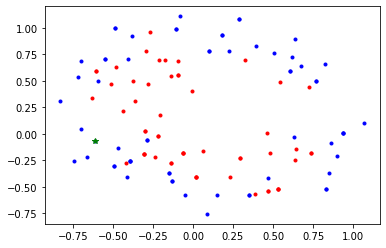

A Blue Point is the Neural Networks classification


In [60]:
classify(x1,x2)

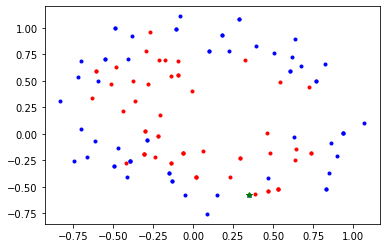

A Blue Point is the Neural Networks classification


In [61]:
classify(x1b,x2b)

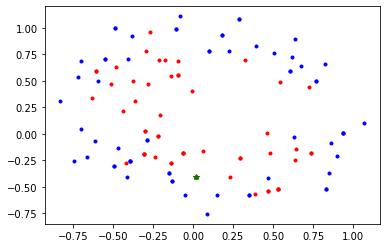

A Blue Point is the Neural Networks classification


In [62]:
classify(x1c,x2c)

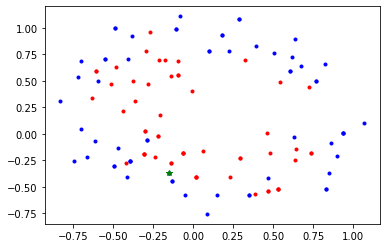

A Blue Point is the Neural Networks classification


In [63]:
classify(x1d,x2d)